In [83]:
%matplotlib inline
import numpy as np
import MDAnalysis as mda
import sys
import getopt


input=["--vec1=6 10", "--vec2=7 15","-s prod_vanilla.tpr","-f ../vdw_2.0/2.0_0.8/clean.xtc"]

try:
    options, files = getopt.getopt(input, 's:f:',['vec1=','vec2=','s=','f='])
except getopt.GetoptError:
    sys.stderr.write("You probably inserted a flag that isn't there")
    raise SystemExit


for opt, val in options:
    
    if opt == '--vec1':
        vec1=val
            
    if opt == '--vec2':
        vec2=val
    
    if opt == '-s':
        topol=val.lstrip()
    
    if opt == '-f':
        traj=val.lstrip()

u=mda.Universe(topol, traj)
Angle1=[]
Angle2=[]
for ts in u.trajectory:
  pos6=np.array(list(u.select_atoms("bynum "+str(vec1)).positions[0]))  #select the atoms
  pos10=np.array(list(u.select_atoms("bynum "+str(vec1)).positions[1])) 
  pos7=np.array(list(u.select_atoms("bynum "+str(vec2)).positions[0]))
  pos15=np.array(list(u.select_atoms("bynum "+str(vec2)).positions[1]))
  #print(pos6)
  vec_z= np.array([0,0,1])                              #define z axis and vec1
  vec_1= np.array(pos10 - pos6)                         #i now need a vec perpendicular to vec6-10 and to vec7-15
  vec_temp= np.array(pos15 - pos7)                      #define a temporary vec7-15 for the cross product to find vec_2 
  vec_2= np.cross(vec_1,vec_temp)                       #->remember here that a x b =! b x a, b x a = -a x b. So this vector should be pointing INTO the plane of the molecule
  norm_vec_z= np.sqrt(np.dot(vec_z, vec_z))             #the norms are for calculating the angles 
  norm_vec_1= np.sqrt(np.dot(vec_1, vec_1))
  norm_vec_2= np.sqrt(np.dot(vec_2, vec_2))
  angle_1=np.rad2deg(np.arccos((np.dot(vec_1,vec_z))/(norm_vec_1*norm_vec_z))) #angles are calculated with the formula
  angle_2=np.rad2deg(np.arccos((np.dot(vec_2,vec_z))/(norm_vec_2*norm_vec_z))) #to find an angle between 2 vectors
  Angle1.append(angle_1)
  Angle2.append(angle_2)
  
  f=open('angles.txt', 'a')                     #open the file with append option
  if ts.time == 0 :                            #if its the first step it empties the file
    f.seek(0)                                  #with this
    f.truncate()                               #and this line
  f.write("%s   %s   %s\n" % (int(ts.time), float(angle_1), float(angle_2))) #spaces are just left inbetween 
  f.close 
  #print(ts.time , "  ", angle_1,  file=f)    #it prints the required info but it require to import __future__

In [72]:
import matplotlib.pyplot as pyp

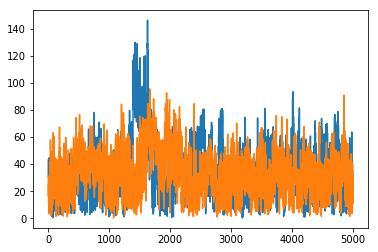

In [81]:
t=pyp.plot(range(5001),Angle1_van[0:5001],Angle1[0:5001])
pyp.savefig('test_delme.png')

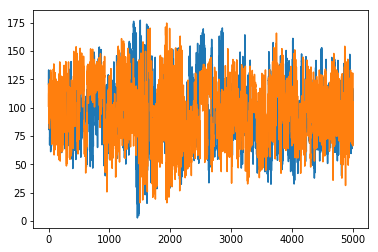

In [82]:
pyp.plot(range(5001),Angle2_van[0:5001],Angle2[0:5001])

In [29]:
np.std(Angle1)

25.353901163946354

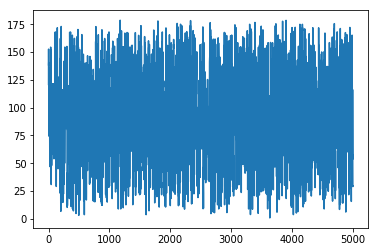

In [76]:
pyp.plot(range(5001),Angle2_van[0:5001])

In [30]:
np.std(Angle2)

16.836126316852123

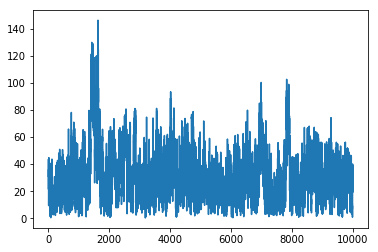

In [34]:
pyp.plot(Angle1)

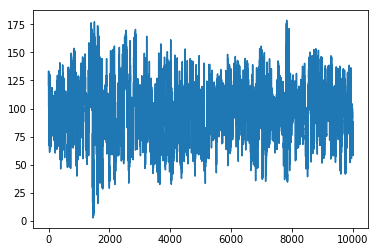

In [35]:
pyp.plot(Angle2)

In [77]:
Angle1_van=Angle1
Angle2_van=Angle2

In [37]:
np.std(Angle2)

24.762656137898517

In [59]:
len(Angle1_van)

5001

In [51]:
len(Angle1)

5001